# Juan Francisco Bernal Calderón
## Código: 202010643
## Entrega 4

In [2]:

import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
connection = sqlite3.connect('Spotify.db')

query = "SELECT * FROM playlists"
playlists = pd.read_sql_query(query, connection)

query = "SELECT * FROM song"
song = pd.read_sql_query(query, connection)

In [258]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import statsmodels.api as sm

In [259]:
playlists.head(10)

,slice,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,0-999,0,1493424000,52,47,1,6,11532414,37
1,0-999,1,1506556800,39,23,1,5,11656470,21
2,0-999,2,1505692800,64,51,1,18,14039958,31
3,0-999,3,1501027200,126,107,1,4,28926058,86
4,0-999,4,1401667200,17,16,2,7,4335282,16
5,0-999,5,1430956800,80,71,1,3,19156557,56
6,0-999,6,1477094400,16,15,1,2,3408479,13
7,0-999,7,1509321600,53,52,1,38,12674796,48
8,0-999,8,1508976000,46,37,2,21,9948921,23
9,0-999,9,1501804800,21,20,1,10,4297488,18


In [260]:
song.head(10)

,track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
1,spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
2,spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
3,spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
4,spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck
5,spotify:track:6y20BV5L33R8YXM0YuI38N,6,5,Queens of the Stone Age,spotify:artist:4pejUc4iciQfgdX6OKulQn,No One Knows,spotify:album:4w3NeXtywU398NYW4903rY,278746,Songs For The Deaf
6,spotify:track:6xy6jNeNTYwjnKTDzMyHw2,6,6,The Cranberries,spotify:artist:7t0rwkOPGlDPEhaOcVtOt9,Zombie,spotify:album:2KsgTeLQXz7yDV1joGOd2L,306440,No Need To Argue (The Complete Sessions 1994-1...
7,spotify:track:0rK3iUuoyQp6QReDPzwlYD,6,7,Misfits,spotify:artist:1cXi8ALPQCBHZbf0EgP4Ey,Monster Mash,spotify:album:6MzZSl19bVR3xWwFCOZyhg,157000,Project 1950
8,spotify:track:2k5lMt43DRIoEZPuswnULH,6,8,Misfits,spotify:artist:1cXi8ALPQCBHZbf0EgP4Ey,Ghouls Night Out - Live,spotify:album:4CWxS5ASY9eRE2zXP8BTRd,102539,Evilive
9,spotify:track:3gN4UFoOnRHlMl3K4kU5zG,6,9,Misfits,spotify:artist:1cXi8ALPQCBHZbf0EgP4Ey,Hybrid Moments,spotify:album:51tAz06EJxwhsk8uNfWxBo,102266,Static Age


Text(0, 0.5, 'Número de Canciones')

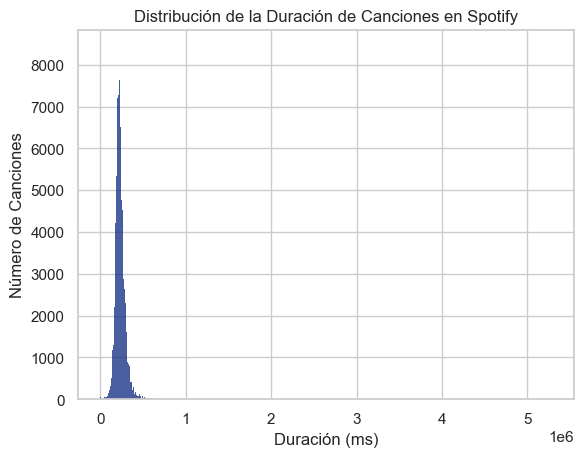

In [3]:
# Distribución de la Duración de Canciones en Spotify
sns.set_theme(style="whitegrid", palette="dark")
sns.histplot (song, x= "duration_ms")
plt.title('Distribución de la Duración de Canciones en Spotify')
plt.xlabel("Duración (ms)")
plt.ylabel("Número de Canciones")

## Interpretación:

Esta gráfica nos muestra la duración promedio en milisegundos de las canciones en la base de datos de Spotify y, tal y como se muestra en el gráfico, la variación en las mismas no cambia mucho y más bien suelen durar la mayoría rangos cercanos de tiempo.

Text(0, 0.5, 'Duración (ms)')

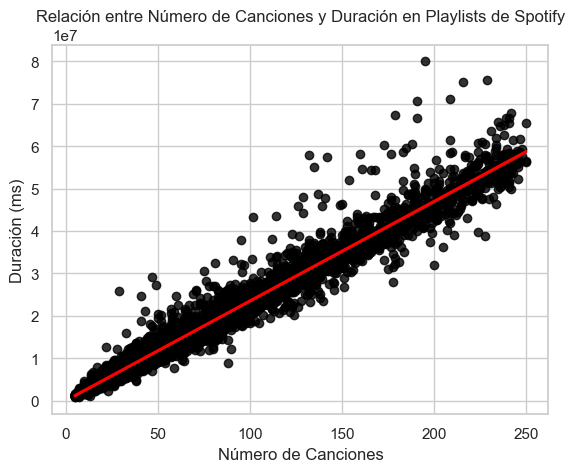

In [287]:
# Relación entre Número de Canciones y Duración en Playlists de Spotify
sns.set_theme(style="whitegrid", palette="deep")
sns.regplot(playlists, x= "num_tracks", y="duration_ms", line_kws={'color': 'red'}, scatter_kws={"color": "black"})
plt.title('Relación entre Número de Canciones y Duración en Playlists de Spotify')
plt.xlabel("Número de Canciones")
plt.ylabel("Duración (ms)")

## Interpretación:

Esta gráfica nos muestra algo evidente, que entre más canciones tiene una playlist, mayor es su duración en milisegundos.

Text(48.194645833333325, 0.5, 'Número de Canciones')

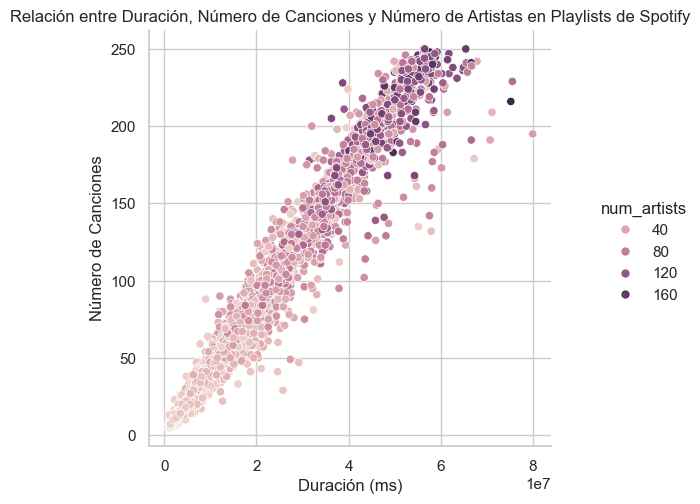

In [11]:
# Relación entre Duración, Número de Canciones y Número de Artistas en Playlists de Spotify
sns.relplot(playlists, x="duration_ms", y="num_tracks", hue= "num_artists", kind= "scatter")
sns.set_theme(style="whitegrid")
plt.title('Relación entre Duración, Número de Canciones y Número de Artistas en Playlists de Spotify')
plt.xlabel("Duración (ms)")
plt.ylabel("Número de Canciones")

## Interpretación:

Esta gráfica muestra la relación entre el numero de canciones, numero de artistas y la duración de las playlists. Como se hizo evidente en la gráfica pasada, entre más canciones mayor la duración. Sin embargo, este gráfico de relación nos ayuda a ver que también existe correlación entre el numero de artistas en una playlist, su numero de canciones y en consiguiente, su duración

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Zombie'),
  Text(1, 0, 'Linger'),
  Text(2, 0, 'Ode To My Family'),
  Text(3, 0, 'Dreams'),
  Text(4, 0, 'Just My Imagination'),
  Text(5, 0, '(They Long To Be) Close To You'),
  Text(6, 0, 'Shattered')])

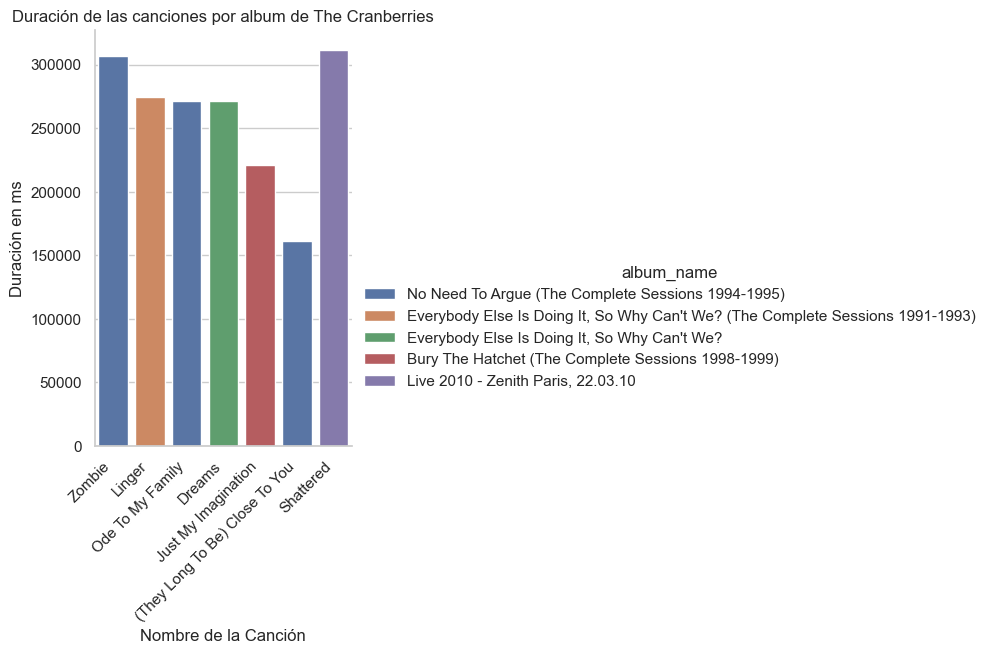

In [272]:
# Duración de las canciones por album de The Cranberries
cranberries_songs = song[song['artist_name'] == 'The Cranberries']
sns.set_theme(style="whitegrid", palette="deep")
sns.catplot(cranberries_songs, x="track_name", y= "duration_ms", kind= "bar", hue ="album_name")
plt.title("Duración de las canciones por album de The Cranberries")
plt.xlabel("Nombre de la Canción")
plt.ylabel("Duración en ms")
plt.xticks(rotation=45, ha='right')

## Interpretación:

Este histograma permite ver de manera facil y rápida cual es la duración de las canciones de The Cranberries en la base de datos. Podemos así comparar cual es la canción más larga y más corta del artista. Asimismo, ya que está categorizado en tonos, permite ver de que album son las canciones. En este caso, la gráfica permite observar como el mismo album "No Need to  Argue" contiene, a su vez, la canción más larga del artista así como su canción más corta

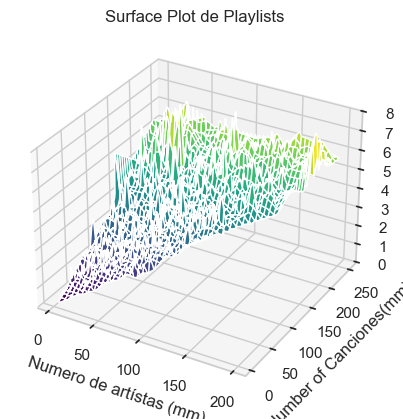

In [265]:
## Surface Plot de Playlists

playlists.dropna(subset=['num_artists', 'num_tracks', 'duration_ms'], inplace=True)
x = playlists['num_artists']
y = playlists['num_tracks']
z = playlists['duration_ms']
x, y = np.meshgrid(np.linspace(x.min(), x.max(), len(x.unique())), 
                   np.linspace(y.min(), y.max(), len(y.unique())))
z = griddata((playlists['num_artists'], playlists['num_tracks']), playlists['duration_ms'], (x, y), method='linear')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
plt.title('Surface Plot de Playlists')
plt.xlabel('Numero de artístas (mm)')
plt.ylabel('Number of Canciones(mm)')
ax.set_zlabel('Duración (ms) (g)')
plt.show()
